# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError
import os

# **Load Dataset**

In [2]:
df = pd.read_csv("Expenses1.csv")
print(df.head())

         Date     Item  Amount Category   Time        day
0  2023-03-01     chai       7    alone   7:00  Wednesday
1  2023-03-01     chai      20   friend  10:00  Wednesday
2  2023-03-01    juice      15   friend  13:00  Wednesday
3  2023-03-01  rikshow      12    alone  14:00  Wednesday
4  2023-03-01   coffee      12    alone  15:00  Wednesday


# **Data Cleaning**

In [3]:
!pip install joblib
import joblib
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", errors="coerce")

# Fill missing values in 'Category'
df['Category'] = df['Category'].fillna("alone")

# Check for missing or duplicated data
print("Jumlah missing values per kolom:")
print(df.isna().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

# Encode categorical data ('Category')
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Menyimpan LabelEncoder untuk digunakan pada Flask
joblib.dump(le, 'label_encoder.pkl')

# Normalisasi fitur 'Amount' dan 'Category' dengan MinMaxScaler
scaler = MinMaxScaler()
df[['Amount', 'Category']] = scaler.fit_transform(df[['Amount', 'Category']])

# Menyimpan scaler untuk digunakan pada Flask
joblib.dump(scaler, 'scaler.pkl')

# Mapping kategori
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping kategori:", mapping)


# Cek hasil setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())

Jumlah missing values per kolom:
Date        0
Item        0
Amount      0
Category    0
Time        0
day         0
dtype: int64

Jumlah data duplikat: 0
Mapping kategori: {'alone': 0, 'friend': 1}

Data setelah normalisasi:
        Date     Item    Amount  Category   Time        day
0 2023-03-01     chai  0.004040       0.0   7:00  Wednesday
1 2023-03-01     chai  0.030303       1.0  10:00  Wednesday
2 2023-03-01    juice  0.020202       1.0  13:00  Wednesday
3 2023-03-01  rikshow  0.014141       0.0  14:00  Wednesday
4 2023-03-01   coffee  0.014141       0.0  15:00  Wednesday


# **Exploratory Data Analysis (EDA)**

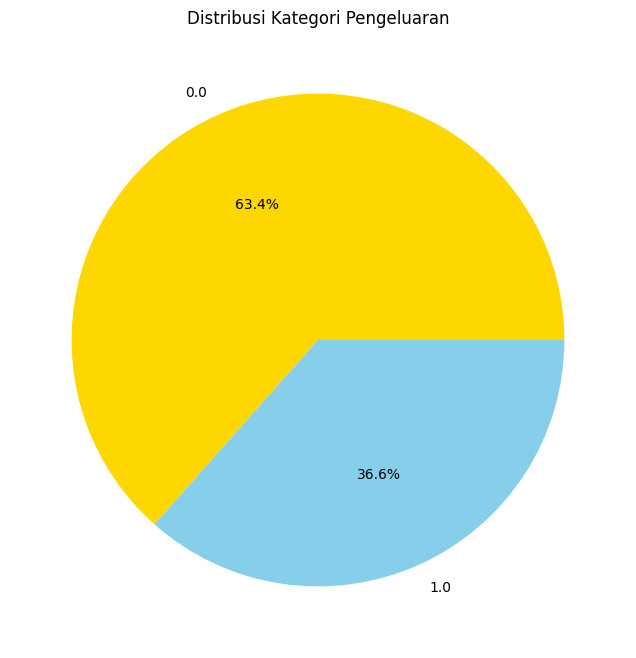

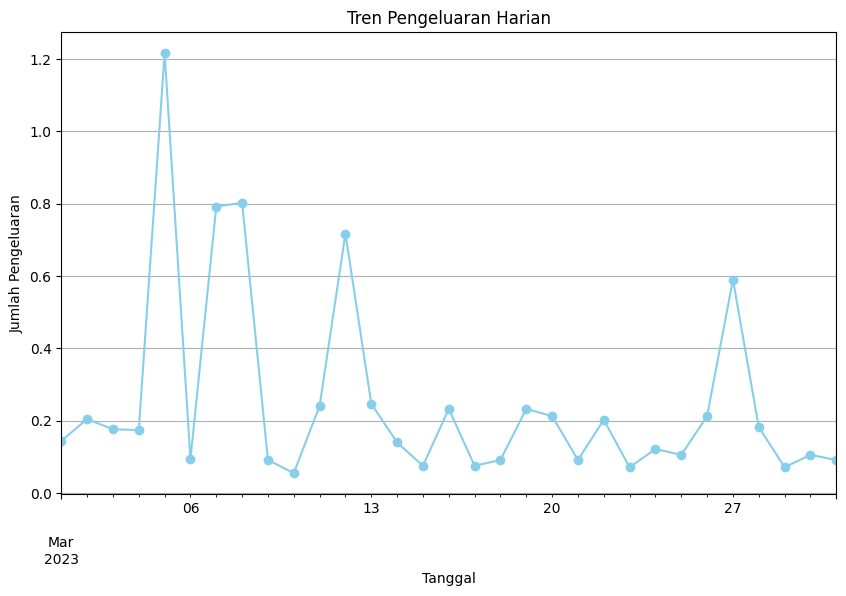

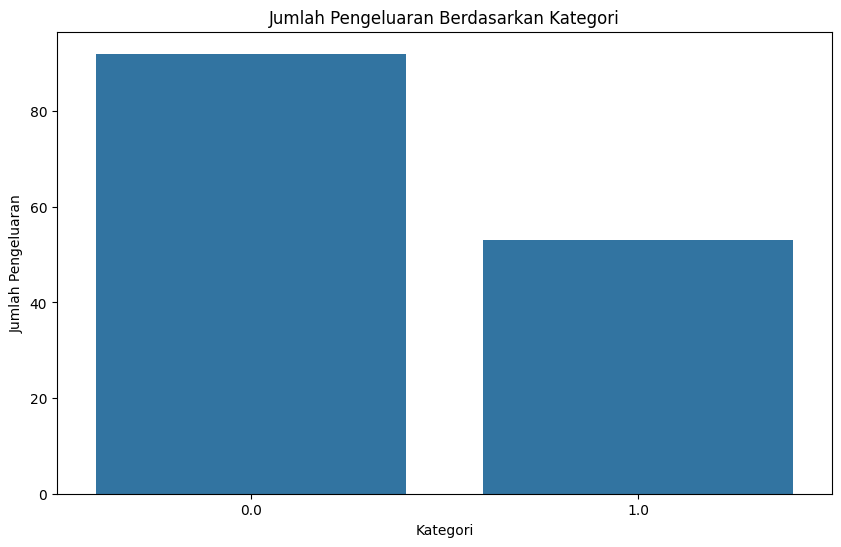

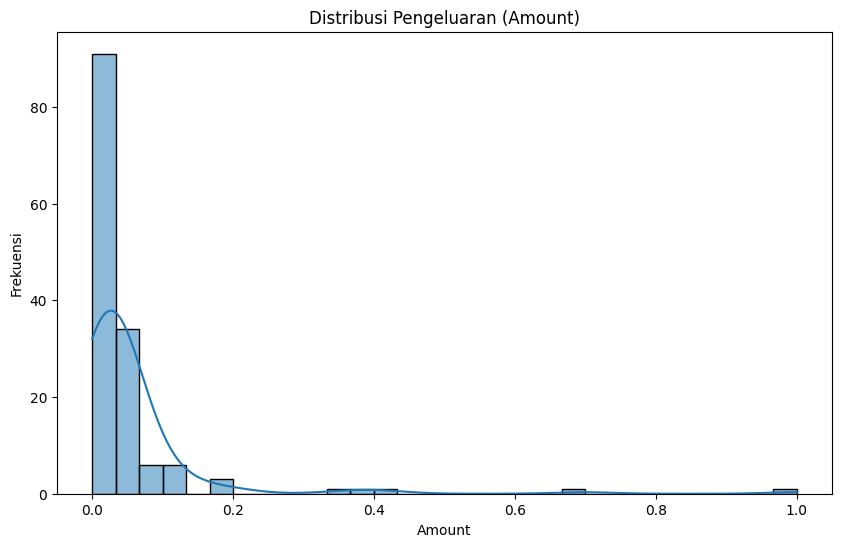

In [4]:
# Visualisasi distribusi kategori pengeluaran
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Distribusi Kategori Pengeluaran')
plt.ylabel('')  # Menghilangkan label default
plt.show()

# Visualisasi tren pengeluaran harian
pengeluaran_harian = df.groupby('Date')['Amount'].sum()
plt.figure(figsize=(10, 6))
pengeluaran_harian.plot(kind='line', marker='o', color='skyblue')
plt.title('Tren Pengeluaran Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengeluaran')
plt.grid(True)
plt.show()

# Visualisasi jumlah pengeluaran berdasarkan kategori
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts())
plt.title('Jumlah Pengeluaran Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pengeluaran')
plt.show()

# Visualisasi distribusi Amount (pengeluaran)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribusi Pengeluaran (Amount)')
plt.xlabel('Amount')
plt.ylabel('Frekuensi')
plt.show()

# **Encoding Categorical Data**

In [5]:
# Encode 'Category' ke format numerik menggunakan LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Dokumentasikan mapping hasil encoding
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping hasil encoding:", category_mapping)

Mapping hasil encoding: {0.0: 0, 1.0: 1}


# **Split Data untuk Pelatihan**

In [6]:
# Pisahkan fitur dan target
X = df[['Amount', 'Category']]  # Fitur
y = df['Amount']  # Target

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape Data:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shape Data:
X_train: (116, 2)
X_test: (29, 2)
y_train: (116,)
y_test: (29,)


# **Normalisasi Data**

In [7]:
# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan contoh data setelah normalisasi
print("Contoh data setelah normalisasi:")
print(X_train_scaled[:5])

Contoh data setelah normalisasi:
[[0.02020202 1.        ]
 [0.01414141 0.        ]
 [0.01010101 0.        ]
 [0.05050505 0.        ]
 [0.03030303 0.        ]]


In [8]:
# Misalkan data Anda adalah sebagai berikut:
# X adalah fitur (misalnya shape (116, 2))
# y adalah target (misalnya shape (116,)) - pastikan panjangnya sama dengan X

# Import StandardScaler
from sklearn.preprocessing import StandardScaler # This line imports StandardScaler

# Contoh data (ganti dengan data Anda)
import numpy as np # This line imports numpy as np
X = np.random.rand(116, 2)  # Fitur dengan 116 sampel dan 2 fitur
y = np.random.rand(116)  # Target dengan 116 nilai

# Penskalaan data fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pembagian data menjadi train dan test
from sklearn.model_selection import train_test_split # This line imports train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cek bentuk data setelah pemisahan
print("Shape X_train_scaled:", X_train_scaled.shape)  # (116, 2)
print("Shape y_train:", y_train.shape)  # (116,)

Shape X_train_scaled: (92, 2)
Shape y_train: (92,)


# **Membuat dan Melatih Model**

In [9]:
import tensorflow as tf
# Menyusun model dengan metrik yang benar
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Melatih model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.1996 - mean_squared_error: 0.1996 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1136 - val_mean_square

# **Evaluasi Model**

In [11]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Loss (MSE): {loss}, MAE: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1206 - mean_squared_error: 0.1206
Loss (MSE): 0.12064298987388611, MAE: 0.12064298987388611


# **Simpan Model**

In [12]:
import tensorflow as tf

# Memuat model dari file best_model.keras
# Check if the file exists first
import os
if os.path.exists('complete_model.h5'):
    model = tf.keras.models.load_model('complete_model.h5')
else:
    print("Error: complete_model.h5 not found. Please ensure the file is in the correct directory or has been saved.")
    # You might need to download or train the model first if it doesn't exist.

# Menyimpan model ke format .h5
model.save('model.h5')

print("Model telah disimpan ke model.h5.")

Error: complete_model.h5 not found. Please ensure the file is in the correct directory or has been saved.
Model telah disimpan ke model.h5.


# **Memuat Model yang Disimpan**

In [13]:
from tensorflow.keras.models import load_model
import tensorflow as tf # Import TensorFlow with the alias 'tf'

# Change 'complete_model.h5' to 'model.h5' as that is what you saved in cell 13
model = tf.keras.models.load_model('model.h5', custom_objects={'mse': MeanSquaredError()})

# Melakukan prediksi menggunakan model yang dimuat
predictions = model.predict(X_test_scaled)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.5130625 ]
 [0.61376584]
 [0.65831983]
 [0.28819096]
 [0.5737405 ]
 [0.53702396]
 [0.4811038 ]
 [0.30311728]
 [0.33697984]
 [0.15466867]
 [0.6661516 ]
 [0.1606253 ]
 [0.25764444]
 [0.32922295]
 [0.3079808 ]
 [0.71340334]
 [0.31860694]
 [0.46851426]
 [0.51986897]
 [0.5958471 ]
 [0.7221391 ]
 [0.36364844]
 [0.2530453 ]
 [0.56133026]]


# **Menggunakan Model untuk Prediksi**

In [14]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# ... your existing code ...

# Memuat model jika sudah disimpan
if os.path.exists('model.h5'):
    model = load_model('model.h5', custom_objects={'mse': MeanSquaredError})  # Specify 'mse' in custom_objects
    print("Model berhasil dimuat.")
else:
    print("Model belum tersedia.")

# ... the rest of your code ...

Model berhasil dimuat.
